In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [7]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(314,2,144)
loaded_mask = load_mask.reshape(314,2,144)

In [8]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(clean_data)

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(clean_voltages)

[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[1537.72 1537.72 1537.733850415512 ... -- -- --]
  [0.9570891236771281 0.9570891236771281 0.9363292088239417 ... -- -- --]]

 [[1537.72 1537.72 1537.733850415512 ... -- -- --]
  [0.9570891236771281 0.9570891236771281 0.9363292088239417 ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]]
[-- -0.9866242038216645 -0.9799363057324925 -0.9732484076433204
 -0.9665605095541484 -0.9598726114649764 -0.9531847133758043
 -0.9464968152866323 -0.9398089171974603 -0.9331210191082883
 -0.9264331210191162 -0.9197452229299442 -0.9130573248407722
 -0.9063694267516001 -0.8996815286624281 -0.8929936305732561
 -0.8863057324840841 -0.879617834394912 -0.87292993630574
 -0.866242038216568 -0.859554140127396 -0.8528662420382239
 -0.8461783439490519 -0.8394904458598799 -0.8328025477707078
 -0.8261146496815358 -0.81942675159236

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


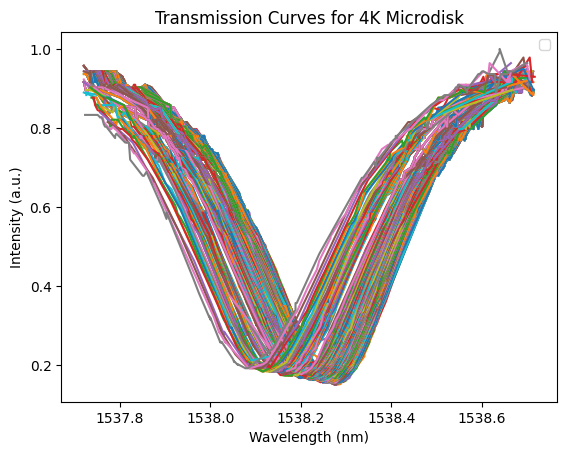

In [9]:
#lets regraph again

for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

In [12]:
#its beautiful
#now we fit

#function for transmission in an all pass ring

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [14]:
n = 10

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power*100, 0.9918, 1.75e-6) #1.75 not 10
x = np.array(clean_data[n][0])
y = np.array(clean_data[n][1])
print(x)

[1537.73385042 1537.7366205  1537.73939058 1537.74216066 1537.74493075
 1537.74770083 1537.75047091 1537.753241   1537.75601108 1537.75878116
 1537.76155125 1537.76432133 1537.76709141 1537.7698615  1537.77263158
 1537.77540166 1537.77817175 1537.78094183 1537.78371191 1537.78648199
 1537.78925208 1537.81418283 1537.81695291 1537.81695291 1537.81972299
 1537.81972299 1537.82249307 1537.82526316 1537.82803324 1537.83080332
 1537.83357341 1537.83634349 1537.83911357 1537.84188366 1537.84465374
 1537.84742382 1537.85019391 1537.85296399 1537.85573407 1537.87789474
 1537.9499169  1537.95268698 1537.95545706 1537.95822715 1537.96099723
 1537.98315789 1537.98315789 1537.98592798 1537.98592798 1537.98869806
 1537.99700831 1538.01362881 1538.01639889 1538.02193906 1538.02193906
 1538.02747922 1538.0634903  1538.07734072 1538.0801108  1538.08288089
 1538.08288089 1538.08842105 1538.0967313  1538.10227147 1538.11058172
 1538.11058172 1538.16044321 1538.17429363 1538.17429363 1538.17429363
 1538.

C:\Users\madel\AppData\Local\Temp\ipykernel_153036\903224186.py:7: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength
C:\Users\madel\AppData\Local\Temp\ipykernel_153036\903224186.py:9: RuntimeWarning: invalid value encountered in cos
  Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
C:\Users\madel\AppData\Local\Temp\ipykernel_153036\903224186.py:10: RuntimeWarning: invalid value encountered in cos
  Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2


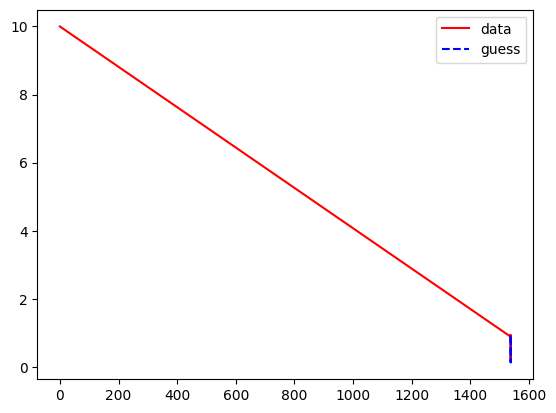

In [17]:

new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.51817, 7.1)

plt.plot(x, y, 'r-', label='data')
plt.plot(x, ans, '--', color ='blue', label ="guess")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [ ]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.51817, 810]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr[12])

NameError: name 'y' is not defined

In [ ]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

NameError: name 'y' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
length = len(values_list)

NameError: name 'values_list' is not defined

In [ ]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power*100, 0.9916, 1.75e-6)

neff = [2.51819078]
alph = [7.1894756286]

for n in range(0, length):
    
    line = []
    line.append(values_list[n][0])

    x = np.array(values_list[n][0])
    y = np.array(values_list[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,2])
    fit_params_arr[0]=[neff[n], alph[n]]
    print("Guess is ", fit_params_arr[0])
    for i in range(len(y)):
        fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
        fit_params_arr[i+1]=fit_params_arr[i]
    fit_params_arr=fit_params_arr[:-1]

    neff.append(fit_params_arr[12][0])
    alph.append(fit_params_arr[12][1])

    print(fit_params_arr[12])
    fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
    trans = fit_ans.tolist()
    line.append(trans)
    print(len(trans))
    fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


NameError: name 'length' is not defined

In [ ]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(length):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()


NameError: name 'length' is not defined

In [ ]:
#removing guess values

neff.pop(0)
alph.pop(0)



7.1894756286

In [ ]:
# trying again fitting for r

fits2 = []

#neff = [2.51819078]
alph = [.71894756286]
#r = [0.9]

for n in range(0, length): #  len(values_list)):
    
    neff_guess = neff[n]
    #alph_guess = alph[n]

    def Guess(wavelength, abscoef_power):
        return Tsymthru(wavelength, neff_guess, abscoef_power*1000, 0.9916, 1.75e-6)

    line = []
    line.append(values_list[n][0])

    x = np.array(values_list[n][0])
    y = np.array(values_list[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    fit_params_arr[0]=[alph[n]]
    print("Guess is ", fit_params_arr[0])
    for i in range(len(y)):
        fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
        fit_params_arr[i+1]=fit_params_arr[i]
    fit_params_arr=fit_params_arr[:-1]

    alph.append(fit_params_arr[12][0])

    print(fit_params_arr[12])
    fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
    trans = fit_ans.tolist()
    line.append(trans)
    print(len(trans))
    fits2.append(line)

    # plt.figure(figsize=(10,6))
    # plt.plot(x, y, 'o', color ='red', label = f'{n}')
    # plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    # plt.xlabel('Wavelength (nm)')
    # plt.ylabel('Transmission')
    # plt.legend()
    # plt.show()
    


NameError: name 'length' is not defined

In [ ]:

for i in range(length):
    plt.plot(fits2[i][0], fits2[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

NameError: name 'length' is not defined

In [ ]:
alph.pop(0)

plt.figure(figsize=(6,6))
plt.plot(voltage_list  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.legend()
plt.show()

NameError: name 'voltage_list' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
i = 100


def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power*1000, 0.99, 1.75e-6)

x = np.array(values_list[n][0])
ans = Guess(x*1e-9,neff[i], alph[i])

plt.figure(figsize=(10,6))
plt.plot(fits2[i][0], fits2[i][1], '--', color ='red', label ="fit")
plt.plot(x, ans, '--', color ='yellow', label ="guess")
plt.plot(values_list[i][0], values_list[i][1], 'o', color ='blue', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

print(alph[i], neff[i])

NameError: name 'values_list' is not defined

In [ ]:
def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power*1000, 0.99, 1.75e-6)


ans = Guess(x*1e-9,neff[i], alph[i])

plt.plot(values_list[i][0], values_list[i][1], 'o', color ='blue', label ="data")
plt.plot(x, ans, '--', color ='red', label ="guess")
plt.legend()

plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# trying again fitting for r

fits3 = []

#neff = [2.51819078]
#alph = [718.94756286]
r = [0.9]

for n in range(0, length): #  len(values_list)):
    
    neff_guess = neff[n]
    alph_guess = alph[n]*1000

    def Guess(wavelength, self_coupling):
        return Tsymthru(wavelength, neff_guess, alph_guess, self_coupling, 1.75e-6)

    line = []
    line.append(values_list[n][0])

    x = np.array(values_list[n][0])
    y = np.array(values_list[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    fit_params_arr[0]=[r[n]]
    print("Guess is ", fit_params_arr[0])
    for i in range(len(y)):
        fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
        fit_params_arr[i+1]=fit_params_arr[i]
    fit_params_arr=fit_params_arr[:-1]

    r.append(fit_params_arr[12][0])

    print(fit_params_arr[12])
    fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
    trans = fit_ans.tolist()
    line.append(trans)
    print(len(trans))
    fits3.append(line)

    # plt.figure(figsize=(10,6))
    # plt.plot(x, y, 'o', color ='red', label = f'{n}')
    # plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    # plt.xlabel('Wavelength (nm)')
    # plt.ylabel('Transmission')
    # plt.legend()
    # plt.show()
    


NameError: name 'length' is not defined

In [ ]:
#this looks so much better
#I'd call this done!!!

for i in range(length):
    plt.plot(fits3[i][0], fits3[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

NameError: name 'length' is not defined

In [ ]:
#remember not to use the first guess in any of these

print(r)
print(len(r))

[0.9]
1


In [ ]:
#removing all the guess values

r.pop(0)

0.9

In [ ]:

plt.plot(voltage_list  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for 4K')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
plt.savefig("Gehl-4K-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

NameError: name 'voltage_list' is not defined

In [ ]:

plt.figure(figsize=(6,6))
plt.plot(voltage_list  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.legend()
plt.show()

NameError: name 'voltage_list' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(voltage_list  , r,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$r$')

plt.legend()
plt.show()

NameError: name 'voltage_list' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
# alpha is all over the place
# I could maybe try doing a fit to just it and see

fits3 = []

#neff = [2.51819078]
alph = [718.94756286]
#r = [0.9]

for n in range(0, len(values_list)):
    
    neff_guess = neff[n]
    r_guess = r[n]
    #alph_guess = alph[n]

    def Guess(wavelength, power_coeff):
        return Tsymthru(wavelength, neff_guess, power_coeff, r_guess, 1.75e-6)

    line = []
    line.append(values_list[n][0])

    x = np.array(values_list[n][0])
    y = np.array(values_list[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    fit_params_arr[0]=[alph[n]]
    print("Guess is ", fit_params_arr[0])
    for i in range(len(y)):
        fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
        fit_params_arr[i+1]=fit_params_arr[i]
    fit_params_arr=fit_params_arr[:-1]

    alph.append(fit_params_arr[12][0])

    print(fit_params_arr[12])
    fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
    trans = fit_ans.tolist()
    line.append(trans)
    print(len(trans))
    fits3.append(line)

    # plt.figure(figsize=(10,6))
    # plt.plot(x, y, 'o', color ='red', label = f'{n}')
    # plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    # plt.xlabel('Wavelength (nm)')
    # plt.ylabel('Transmission')
    # plt.legend()
    # plt.show()
    


NameError: name 'values_list' is not defined

In [ ]:

for i in range(len(values_list)):
    plt.plot(fits3[i][0], fits3[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

NameError: name 'values_list' is not defined

In [ ]:
alph.pop(0)

plt.figure(figsize=(6,6))
plt.plot(voltage_list  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.legend()
plt.show()

NameError: name 'voltage_list' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
for i in range(0,len(voltage_list)):
    if voltage_list[i] == 0.027741935483868968 :
        break


print(voltage_list[i])
print(i)
print(neff[i])

NameError: name 'voltage_list' is not defined